###Tarea 3 a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tarea 3 b

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

filepath = "/content/drive/MyDrive/CienciaDeDatos/train.csv"
Superstore=pd.read_csv(filepath,index_col='Order Date',parse_dates=['Order Date'],dayfirst=True) #cuando pones parse_dates necesitas decirle que va primero si el dia, el mes o año

Superstore.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Tarea 3 c

In [ ]:
#Filtro el subconjunto de datos que son de interes, ventas de la categoria Furniture en la ciudad de Los Angeles.
SuperstoreLAF= Superstore.loc[(Superstore.City.isin(['Los Angeles']) ) &  (Superstore.Category.isin(['Furniture']))]

#SuperstoreLAF.head()

In [ ]:
SuperstoreLAF=SuperstoreLAF.groupby('Order Date').sum()
#SuperstoreLAF.sort_values(by = 'Order Date')
#SuperstoreLAF

Text(0.5, 0, 'Fecha')

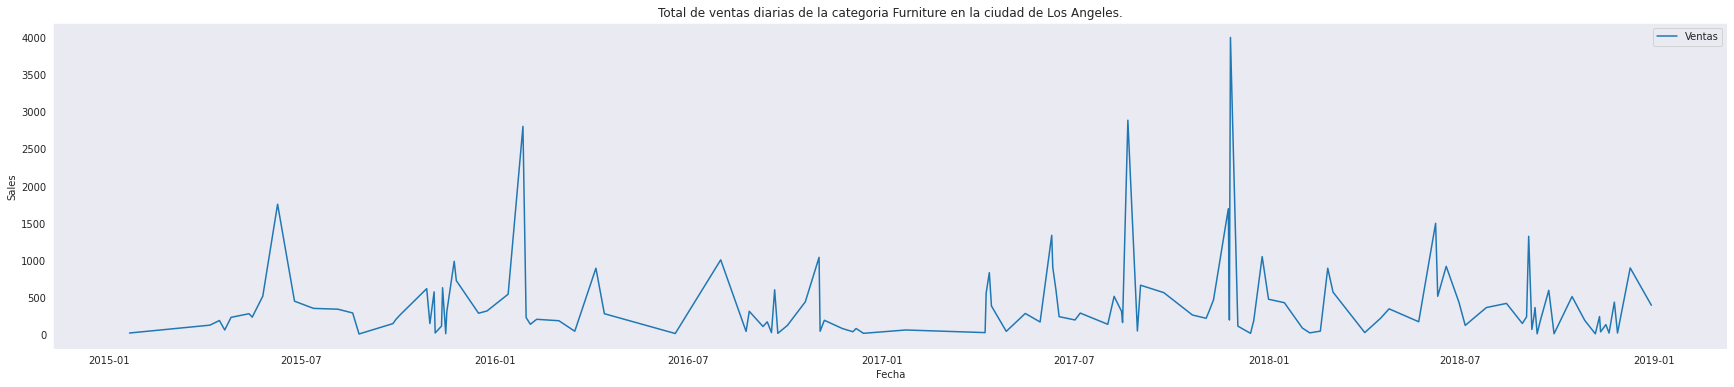

In [ ]:
plt.figure(figsize=(30,6))
sns.set_style("dark")
plt.title("Total de ventas diarias de la categoria Furniture en la ciudad de Los Angeles.")

#plt.xticks(rotation=90) #Descomenta esto si queres un anguno a las etiquetas horizontales
sns.lineplot(data=SuperstoreLAF['Sales'], label="Ventas")

plt.xlabel("Fecha")

###Tarea 3 d




In [ ]:
import datetime as dt
import calendar as cal
Superstore=pd.read_csv(filepath)

#funcion que da el numero de la semana dada una fecha, donde 0 es Lunes y 6 Domingo
def dia_de_la_semana(dia):
  diadeVenta=dt.datetime.strptime(dia, '%d/%m/%Y')
  diadelasemana=diadeVenta.weekday()
  return diadelasemana

#Convierte las fechas objetos si no son objetos
if not(Superstore.dtypes[2] == Superstore.dtypes[3]):
  Superstore["Order Date"]=Superstore["Order Date"].dt.strftime('%d/%m/%Y')

In [ ]:
#Agrego al Data Frame Superstore la columna con los numeros de los dias
Superstore['Dia de la Semana']=Superstore['Order Date'].map(lambda d:dia_de_la_semana(d))
#Genero un Data Frame nuevo con la suma de Ventas de cada dia de la Semana
SuperstoreSemanal=pd.DataFrame(Superstore.groupby('Dia de la Semana').Sales.sum())
total=SuperstoreSemanal.Sales.sum()
#agrego la columna de porcentajes
SuperstoreSemanal['Porcentaje']=SuperstoreSemanal['Sales'].map(lambda d:d*100/total)
#renombro los indices
SuperstoreSemanal=SuperstoreSemanal.set_axis([cal.day_name[0], cal.day_name[1], cal.day_name[2],cal.day_name[3], cal.day_name[4], cal.day_name[5],cal.day_name[6]], axis=0)
SuperstoreSemanal

,Sales,Porcentaje
Monday,348791.5516,15.422767
Tuesday,420535.9243,18.595140
Wednesday,315888.9722,13.967890
Thursday,142839.2402,6.316026
Friday,234710.8402,10.378378
Saturday,420901.4763,18.611304
Sunday,377868.7779,16.708496


In [ ]:
print(f'El dia que mas se vende es {SuperstoreSemanal.Porcentaje.idxmax()} con un porcentaje de {SuperstoreSemanal.Porcentaje.max()}.El dia que menos se vende es {SuperstoreSemanal.Porcentaje.idxmin()} con un porcentaje de {SuperstoreSemanal.Porcentaje.min()}  ')

El dia que mas se vende es Saturday con un porcentaje de 18.611303584348285.El dia que menos se vende es Thursday con un porcentaje de 6.31602551383079  


###Tarea 3e

Text(0.5, 0, 'Dia de la Semana')

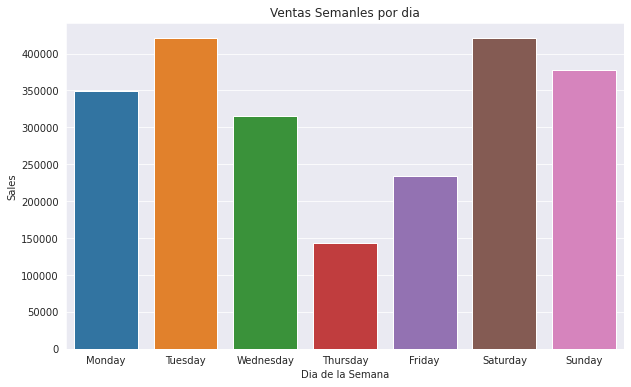

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Ventas Semanles por dia")
sns.barplot(x=SuperstoreSemanal.index, y=SuperstoreSemanal['Sales'])
plt.xlabel("Dia de la Semana")

